## Datasaurus Dozen
Datasaurus Dozen to zestaw danych stworzony przez Justin Matejka i George'a Fitzmaurice, który ilustruje dlaczego wizualizacja danych jest tak ważna.

## Czym jest Datasaurus Dozen?
To 13 różnych zestawów danych, które mają niemal identyczne statystyki opisowe (średnią, odchylenie standardowe, korelację), ale gdy je zwizualizujemy, wyglądają kompletnie inaczej! Jeden z nich tworzy kształt dinozaura, inne tworzą gwiazdę, okrąg, linie itp.

## Dlaczego to ważne?
Pokazuje, że samo patrzenie na statystyki może być mylące. Zawsze trzeba wizualizować dane!

In [5]:
# Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ustawienia wizualizacji
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_style("whitegrid")


# CZĘŚĆ 1: Wczytywanie danych

In [6]:
print("Wczytywanie danych Datasaurus Dozen...")
datasaurus = pd.read_csv("datasaurus.csv", sep=',')
print(f"✓ Wczytano {len(datasaurus)} wierszy danych")
print(f"✓ Liczba różnych zestawów: {datasaurus['dataset'].nunique()}")
print("\nDostępne zestawy danych:")
print(datasaurus['dataset'].unique())


print("\nPierwsze wiersze danych:")
print(datasaurus.head(10))

Wczytywanie danych Datasaurus Dozen...
✓ Wczytano 1846 wierszy danych
✓ Liczba różnych zestawów: 13

Dostępne zestawy danych:
['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots'
 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines']

Pierwsze wiersze danych:
  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333
5    dino  38.7179  84.8718
6    dino  35.6410  79.8718
7    dino  33.0769  77.5641
8    dino  28.9744  74.4872
9    dino  26.1538  71.4103


# CZĘŚĆ 2: Analiza statystyczna


In [ ]:
# Obliczmy podstawowe statystyki dla każdego zestawu
stats_summary = datasaurus.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std']
}).round(2)

# Obliczmy korelację dla każdego zestawu
correlations = datasaurus.groupby('dataset').apply(
    lambda group: np.corrcoef(group['x'], group['y'])[0, 1]
).round(2)

print("\nStatystyki dla każdego zestawu danych:")
print(stats_summary)
print("\nKorelacje między x i y:")
print(correlations)



Statystyki dla każdego zestawu danych:
                x             y       
             mean    std   mean    std
dataset                               
away        54.27  16.77  47.83  26.94
bullseye    54.27  16.77  47.83  26.94
circle      54.27  16.76  47.84  26.93
dino        54.26  16.77  47.83  26.94
dots        54.26  16.77  47.84  26.93
h_lines     54.26  16.77  47.83  26.94
high_lines  54.27  16.77  47.84  26.94
slant_down  54.27  16.77  47.84  26.94
slant_up    54.27  16.77  47.83  26.94
star        54.27  16.77  47.84  26.93
v_lines     54.27  16.77  47.84  26.94
wide_lines  54.27  16.77  47.83  26.94
x_shape     54.26  16.77  47.84  26.93

Korelacje między x i y:
dataset
away         -0.06
bullseye     -0.07
circle       -0.07
dino         -0.06
dots         -0.06
h_lines      -0.06
high_lines   -0.07
slant_down   -0.07
slant_up     -0.07
star         -0.06
v_lines      -0.07
wide_lines   -0.07
x_shape      -0.07
dtype: float64


/tmp/ipython-input-2920298008.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = datasaurus.groupby('dataset').apply(


# CZĘŚĆ 3: WIZUALIZACJA - Tutaj magia się dzieje!

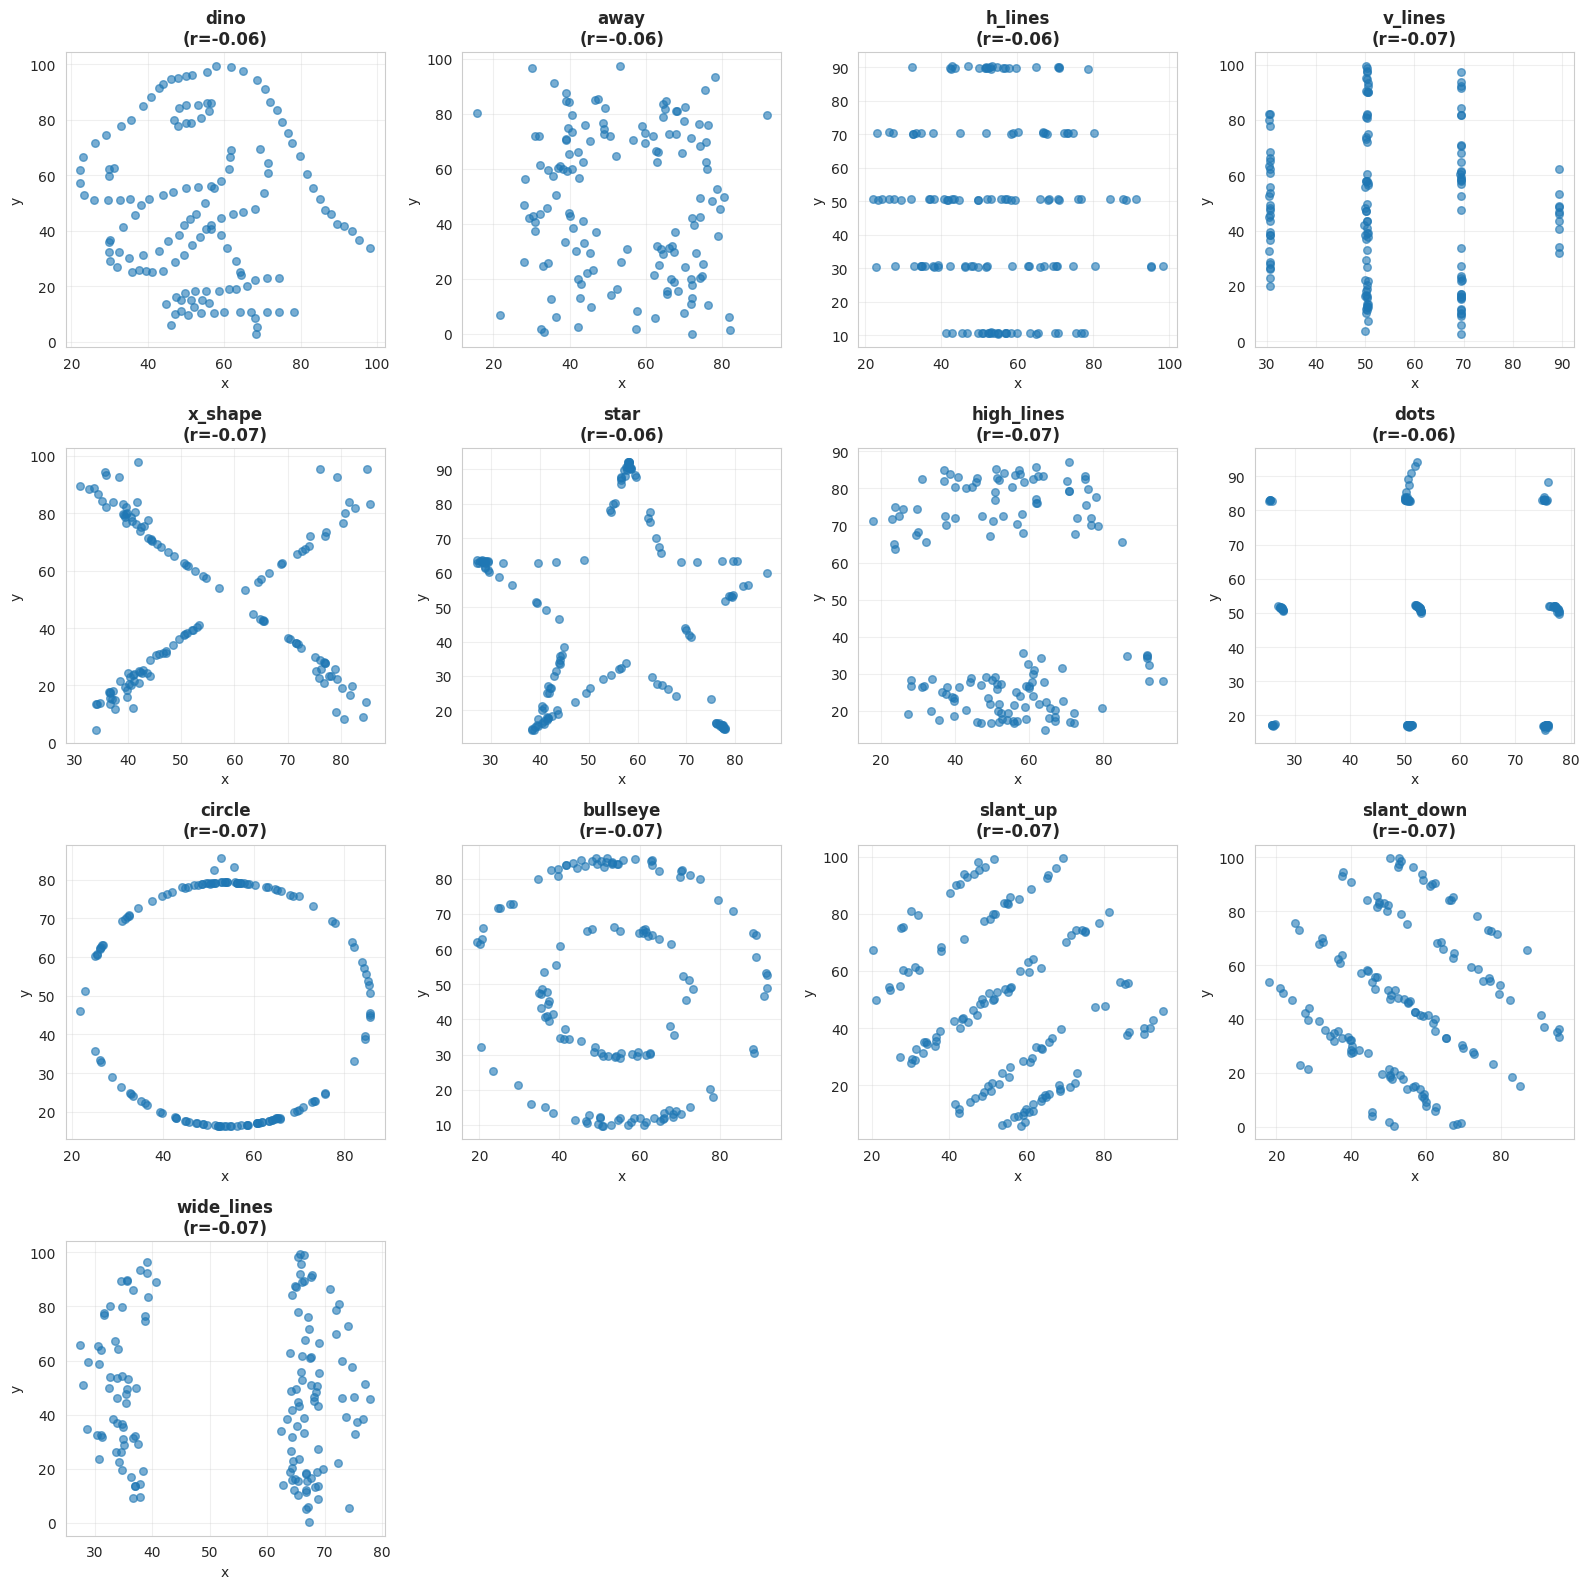

In [ ]:
# Pobierzmy unikalne nazwy zestawów
datasets = datasaurus['dataset'].unique()
n_datasets = len(datasets)

# Obliczmy układ siatki
n_cols = 4
n_rows = (n_datasets + n_cols - 1) // n_cols

# Stwórzmy wielką wizualizację
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten() if n_datasets > 1 else [axes]

for idx, dataset_name in enumerate(datasets):
    # Filtruj dane dla tego zestawu
    subset = datasaurus[datasaurus['dataset'] == dataset_name]

    # Rysuj scatter plot
    axes[idx].scatter(subset['x'], subset['y'], alpha=0.6, s=30)
    axes[idx].set_title(f'{dataset_name}\n(r={correlations[dataset_name]:.2f})',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].grid(True, alpha=0.3)

# Ukryj puste subploty
for idx in range(n_datasets, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()

# CZĘŚĆ 4: Szczegółowa analiza jednego zestawu (dino)


Statystyki dla zestawu 'dino':
  Średnia x: 54.26
  Średnia y: 47.83
  Odchylenie std x: 16.77
  Odchylenie std y: 26.94
  Korelacja: -0.06


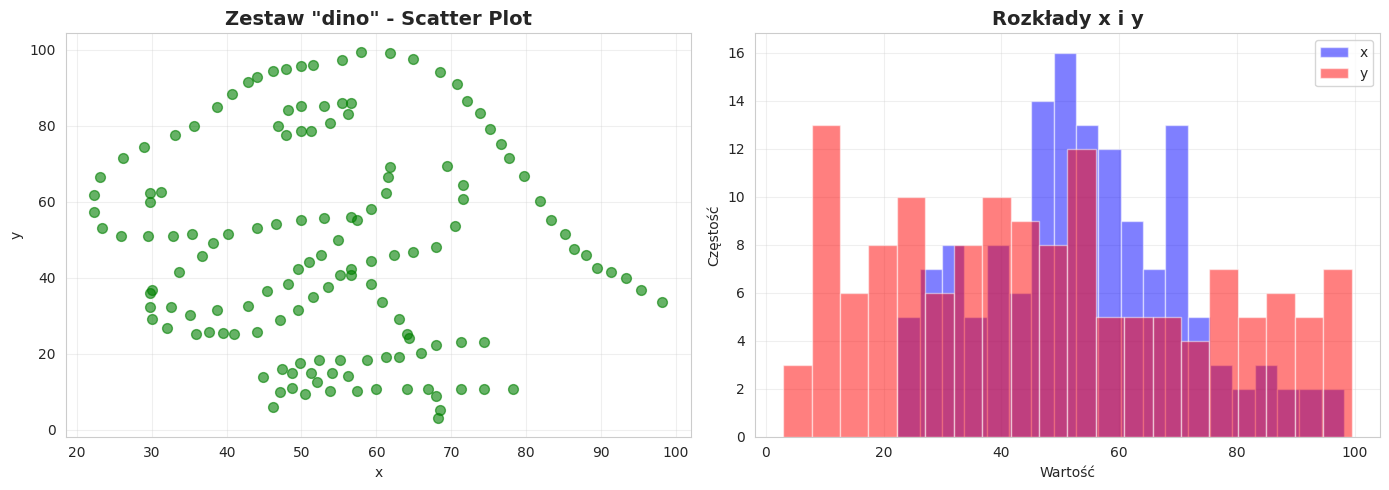

In [ ]:
dino = datasaurus[datasaurus['dataset'] == 'dino']

print(f"\nStatystyki dla zestawu 'dino':")
print(f"  Średnia x: {dino['x'].mean():.2f}")
print(f"  Średnia y: {dino['y'].mean():.2f}")
print(f"  Odchylenie std x: {dino['x'].std():.2f}")
print(f"  Odchylenie std y: {dino['y'].std():.2f}")
print(f"  Korelacja: {np.corrcoef(dino['x'], dino['y'])[0,1]:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres rozrzutu
axes[0].scatter(dino['x'], dino['y'], alpha=0.6, s=50, color='green')
axes[0].set_title('Zestaw "dino" - Scatter Plot', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)

# Histogramy
axes[1].hist(dino['x'], alpha=0.5, label='x', bins=20, color='blue')
axes[1].hist(dino['y'], alpha=0.5, label='y', bins=20, color='red')
axes[1].set_title('Rozkłady x i y', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Wartość')
axes[1].set_ylabel('Częstość')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Podsumowanie

1. STATYSTYKI MOGĄ BYĆ IDENTYCZNE
   
   Wszystkie zestawy mają podobne:
   - Średnie (około 54 dla x, około 47 dla y)
   - Odchylenia standardowe
   - Korelacje (około -0.06)

2. ALE DANE SĄ RÓŻNE!
   Wizualizacja pokazuje kompletnie różne kształty:
   - Dinozaur
   - Gwiazda
   - Okrąg
   - Linie
   - i wiele innych!

3. MORAŁ: **ZAWSZE WIZUALIZUJ SWOJE DANE!**
   
   Samo patrzenie na statystyki może być bardzo mylące.
   
   Dwa zbiory danych mogą mieć identyczne statystyki,
   ale reprezentować kompletnie różne zjawiska.

4. PRAKTYCZNE ZASTOSOWANIE:
   - Przed analizą statystyczną, zrób wykres
   - Sprawdź rozkład danych
   - Szukaj wartości odstających (outliers)
   - Zidentyfikuj wzorce, które statystyki mogą ukryć

**ZADANIE 1: Analiza porównawcza (łatwe)**
--------------------------------------
Wybierz dwa zestawy danych z Datasaurus Dozen i:

a) Oblicz wszystkie statystyki opisowe (w tym kurtozę, IQR, ...)

b) Stwórz wykresy rozkładu x i y.

c) Napisz krótki opis różnic między nimi.


Statystyki opisowe dla zestawu 'dino':


,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200



Kurtoza:
x   -0.212295
y   -1.029939
dtype: float64

IQR:
x    20.641000
y    43.237225
dtype: float64

Statystyki opisowe dla zestawu 'circle':


,x,y
count,142.000000,142.000000
mean,54.267320,47.837717
std,16.760013,26.930036
min,21.863581,16.326546
25%,43.379116,18.349610
50%,54.023213,51.025022
75%,64.972672,77.782382
max,85.664761,85.578134



Kurtoza:
x   -0.615411
y   -1.806974
dtype: float64

IQR:
x    21.593556
y    59.432772
dtype: float64


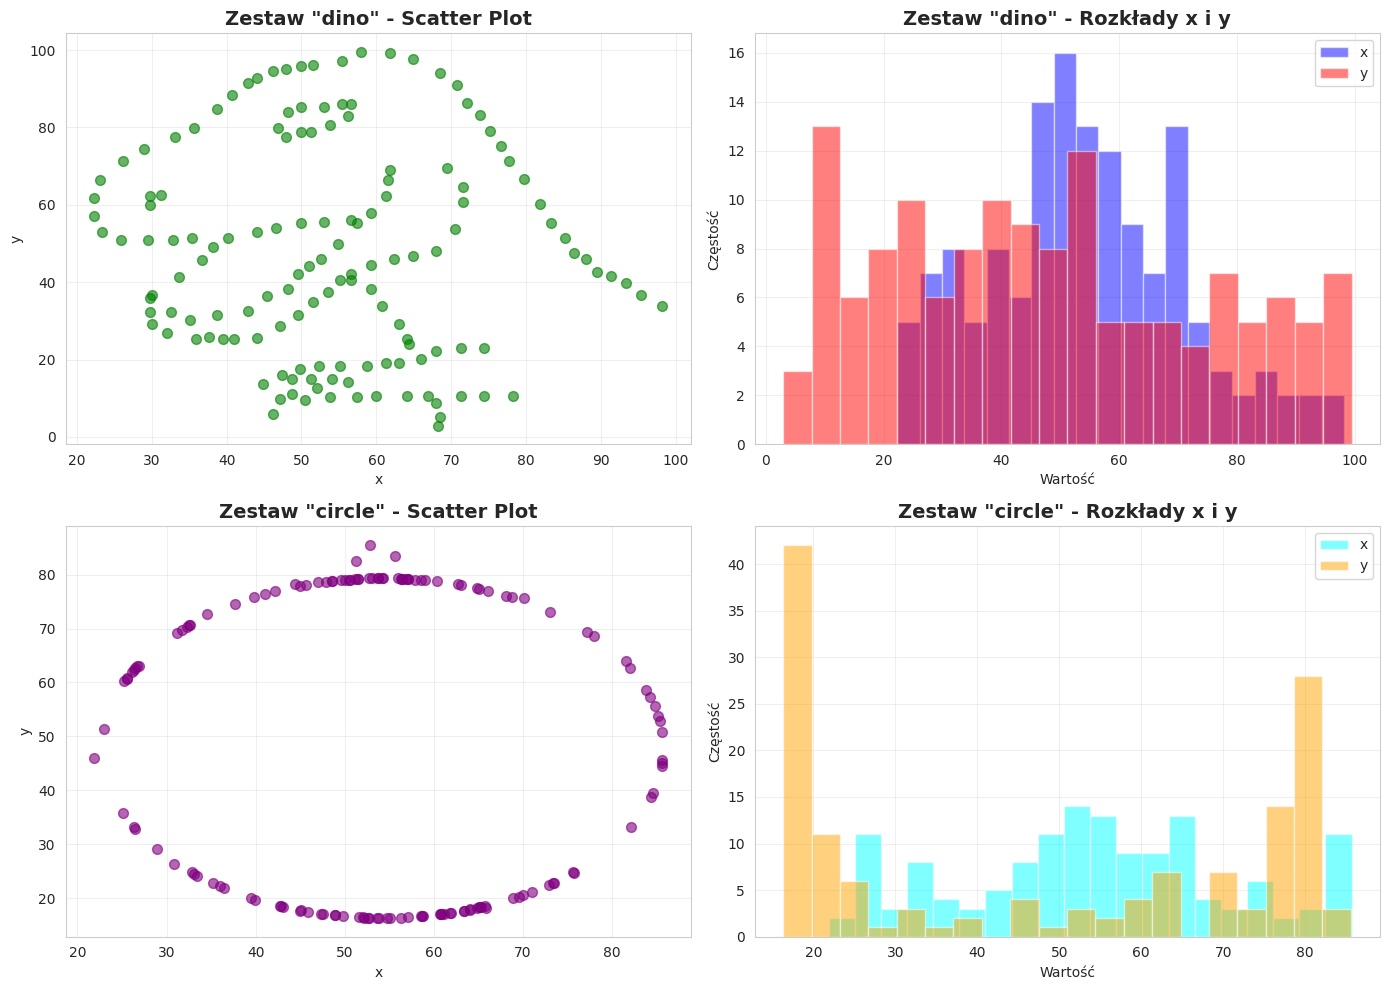

In [9]:
dataset1_name = 'dino'
dataset2_name = 'circle'

dataset1 = datasaurus[datasaurus['dataset'] == dataset1_name]
dataset2 = datasaurus[datasaurus['dataset'] == dataset2_name]

print(f"Statystyki opisowe dla zestawu '{dataset1_name}':")
display(dataset1[['x', 'y']].describe())
print("\nKurtoza:")
print(dataset1[['x', 'y']].kurtosis())
print("\nIQR:")
print(dataset1[['x', 'y']].quantile(0.75) - dataset1[['x', 'y']].quantile(0.25))

print(f"\nStatystyki opisowe dla zestawu '{dataset2_name}':")
display(dataset2[['x', 'y']].describe())
print("\nKurtoza:")
print(dataset2[['x', 'y']].kurtosis())
print("\nIQR:")
print(dataset2[['x', 'y']].quantile(0.75) - dataset2[['x', 'y']].quantile(0.25))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(dataset1['x'], dataset1['y'], alpha=0.6, s=50, color='green')
axes[0, 0].set_title(f'Zestaw "{dataset1_name}" - Scatter Plot', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(dataset1['x'], alpha=0.5, label='x', bins=20, color='blue')
axes[0, 1].hist(dataset1['y'], alpha=0.5, label='y', bins=20, color='red')
axes[0, 1].set_title(f'Zestaw "{dataset1_name}" - Rozkłady x i y', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Wartość')
axes[0, 1].set_ylabel('Częstość')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(dataset2['x'], dataset2['y'], alpha=0.6, s=50, color='purple')
axes[1, 0].set_title(f'Zestaw "{dataset2_name}" - Scatter Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(dataset2['x'], alpha=0.5, label='x', bins=20, color='cyan')
axes[1, 1].hist(dataset2['y'], alpha=0.5, label='y', bins=20, color='orange')
axes[1, 1].set_title(f'Zestaw "{dataset2_name}" - Rozkłady x i y', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Wartość')
axes[1, 1].set_ylabel('Częstość')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

**ZADANIE 2: Stwórz własny przykład (dla ambitnych)**
-------------------------------------------
Spróbuj stworzyć dwa zestawy danych, które mają:
- Podobną średnią
- Podobne odchylenie standardowe
- Ale różne kształty na wykresie

Statystyki dla własnych zestawów danych:


x             y       
          mean    std   mean    std
dataset                            
klaster  50.22   9.54  50.65  10.84
linia    50.00  29.30  24.48  15.53

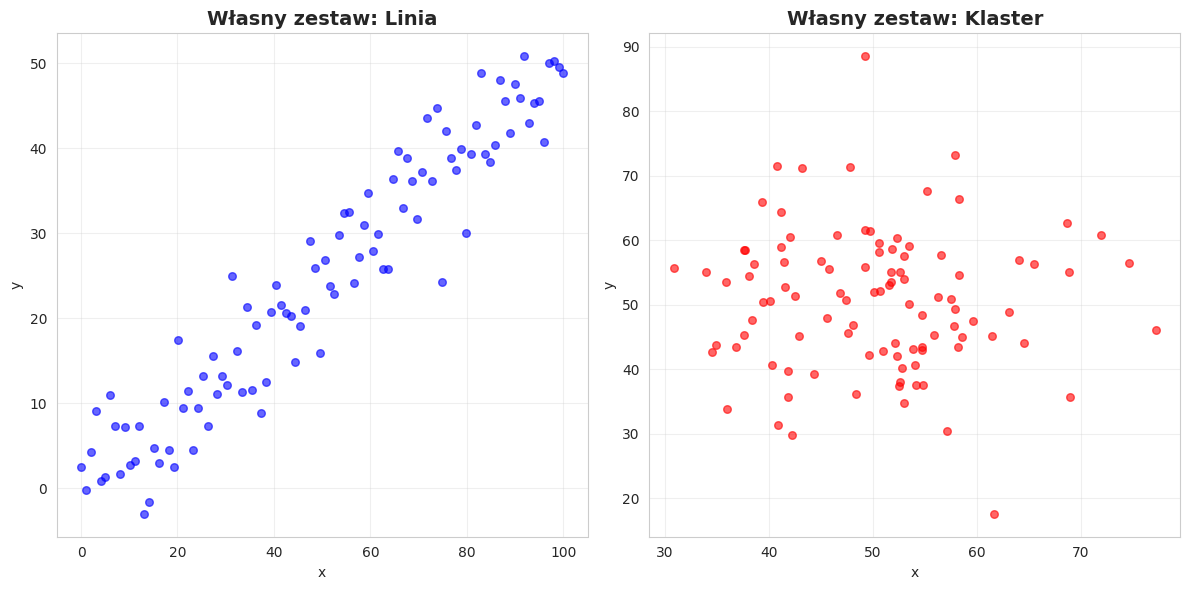

In [10]:
np.random.seed(42)
x_line = np.linspace(0, 100, 100)
y_line = x_line * 0.5 + np.random.normal(0, 5, 100)

df_line = pd.DataFrame({'x': x_line, 'y': y_line, 'dataset': 'linia'})

x_cluster = np.random.normal(50, 10, 100)
y_cluster = np.random.normal(50, 10, 100)

df_cluster = pd.DataFrame({'x': x_cluster, 'y': y_cluster, 'dataset': 'klaster'})

custom_datasaurus = pd.concat([df_line, df_cluster])

print("Statystyki dla własnych zestawów danych:")
stats_custom = custom_datasaurus.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std']
}).round(2)
display(stats_custom)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(df_line['x'], df_line['y'], alpha=0.6, s=30, color='blue')
axes[0].set_title('Własny zestaw: Linia', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df_cluster['x'], df_cluster['y'], alpha=0.6, s=30, color='red')
axes[1].set_title('Własny zestaw: Klaster', fontsize=14, fontweight='bold')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()